In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
import sklearn.linear_model
import statsmodels.formula.api as smf
%matplotlib inline
sns.set_style('dark')

## Models to try
1) Simple linear regression
2) Lasso
3) Ridge
4) complex model 6 features
5) model w all features
6) Polynomial

* make a datarframe containing the results of all the models
* results to look for: R^2, MSE
    Make it for both training and test sets
    
    
    
* Year built, 
* Whether renovation has been done yet
* lot to house ratio

#Write down the goal/question
For technical, show that the modeling is correct
For the non-technical, exlpain why the model is important and how does it help

In [2]:
raw_data = pd.read_csv("kc_house_data.csv")
display(raw_data.head())
print(raw_data.dtypes)
print(raw_data.shape)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
(21613, 21)


In [3]:
display(raw_data.notnull().all())
raw_data.dtypes

id               True
date             True
price            True
bedrooms         True
bathrooms        True
sqft_living      True
sqft_lot         True
floors           True
waterfront       True
view             True
condition        True
grade            True
sqft_above       True
sqft_basement    True
yr_built         True
yr_renovated     True
zipcode          True
lat              True
long             True
sqft_living15    True
sqft_lot15       True
dtype: bool

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Data Exploration

In [4]:
raw_data.drop(['id', 'date'], axis=1, inplace=True)
raw_data.shape

(21613, 19)

C:\Users\sohai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


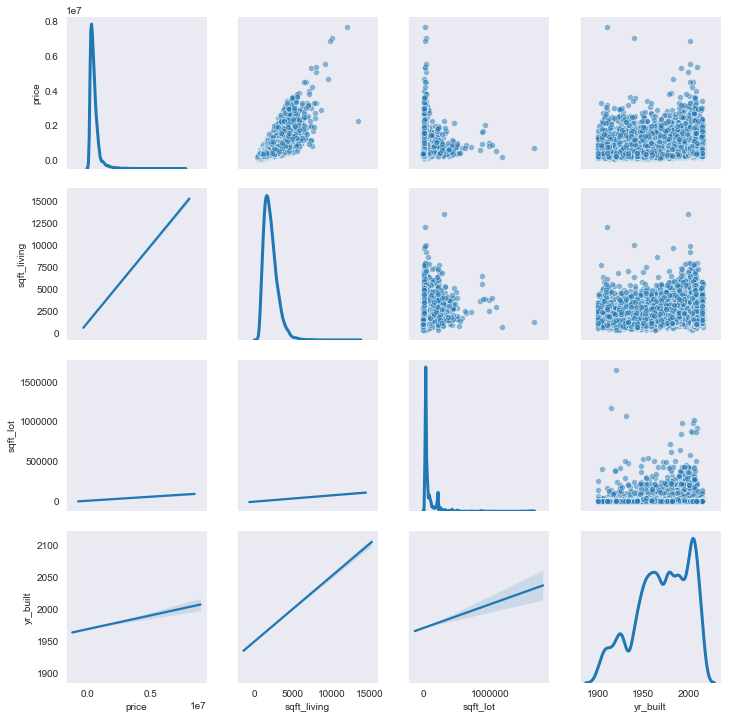

In [5]:
home_info = raw_data.loc[:, ('price', 'sqft_living', 'sqft_lot', 'yr_built')]
sns.set_style(style='dark')
g = sns.PairGrid(home_info, diag_sharey=False)
g.map_upper(sns.scatterplot, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()
#We got some outliers in both bedrooms and sqft lot, so lets take care of those in a bit

In [6]:
drop = raw_data.loc[raw_data['price']>raw_data['price'].std()*3].index
raw_data = raw_data.drop(index=drop)
raw_data.shape

(20424, 19)

In [7]:
lot_drop = raw_data.loc[raw_data['sqft_lot']>raw_data['sqft_lot'].quantile(.75)].index
raw_data = raw_data.drop(index=lot_drop)

C:\Users\sohai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


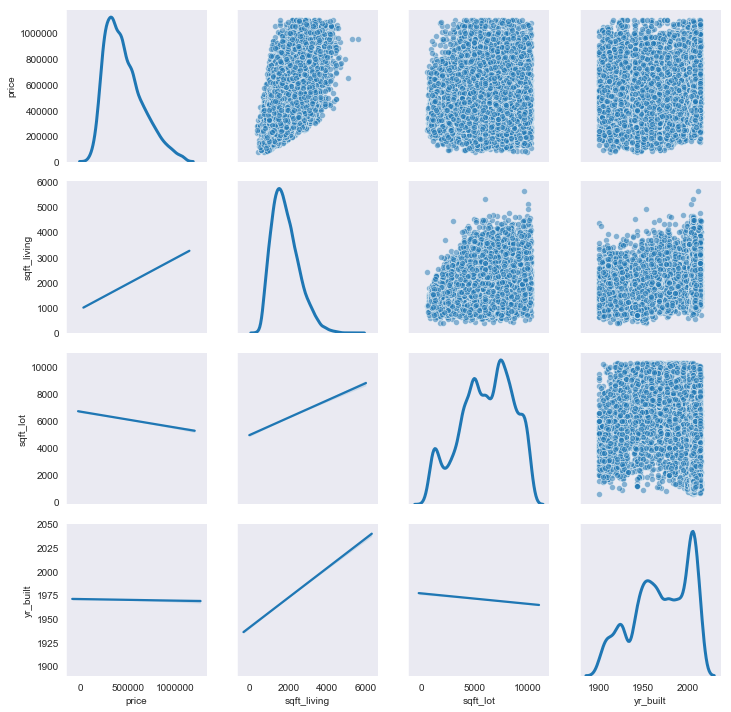

In [8]:
home_info = raw_data.loc[:, ('price', 'sqft_living', 'sqft_lot', 'yr_built')]
sns.set_style(style='dark')
g = sns.PairGrid(home_info, diag_sharey=False)
g.map_upper(sns.scatterplot, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

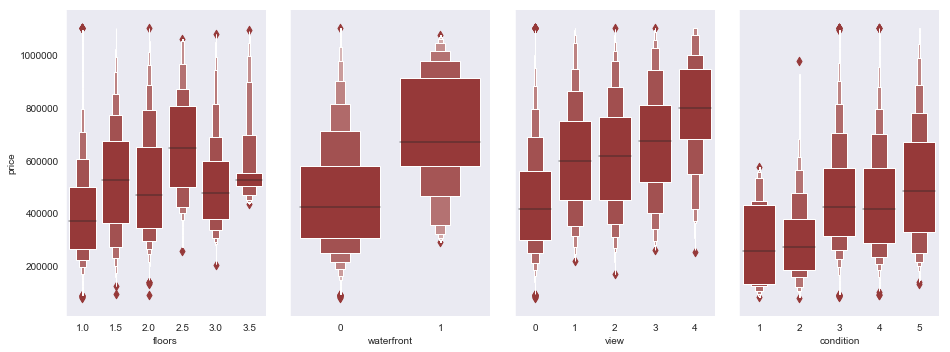

In [9]:
cat = raw_data.loc[:, ['price', 'floors','bedrooms', 'bathrooms', 'waterfront', 'view', 'condition']]

g = sns.PairGrid(cat, y_vars=['price'], x_vars=['floors', 'waterfront', 'view', 'condition'], height=5, aspect=.65)
g = g.map(sns.boxenplot, color='brown')

plt.show()

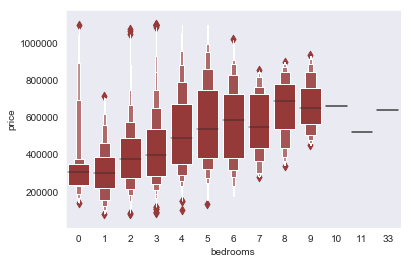

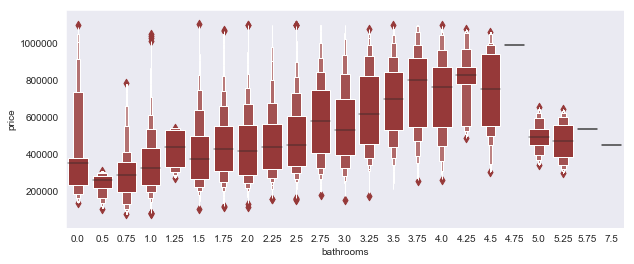

In [10]:
sns.boxenplot(raw_data['bedrooms'], y=raw_data['price'], color='brown')
plt.show()
plt.figure(figsize=(10,4))
sns.boxenplot(raw_data['bathrooms'], y=raw_data['price'], color='brown', width=.8)
plt.show()

### Outlier Removal

In [11]:
raw_data.loc[raw_data['bathrooms']>5]
#Seem like normal properties

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4598,643500.0,6,5.25,3600,3960,2.0,0,0,3,7,2400,1200,1971,0,98126,47.5656,-122.372,1450,4600
8546,450000.0,9,7.50,4050,6504,2.0,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
15751,540000.0,7,5.75,3700,7647,2.0,0,1,3,8,3700,0,1948,1984,98155,47.7393,-122.289,2510,7479
16803,300000.0,6,5.25,2860,5682,2.0,0,0,3,7,2860,0,1978,0,98002,47.3030,-122.221,1390,5956


In [12]:
house_drop = raw_data.loc[raw_data['bedrooms']>15].index
raw_data.loc[raw_data['bedrooms']>15]
#outlier detection and removal

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [13]:
raw_data = raw_data.drop(index=house_drop) #try transformations to see if the peaks can be treated

In [14]:
bed_drop = raw_data.loc[raw_data['bedrooms']==0].index
raw_data = raw_data.drop(index=bed_drop)


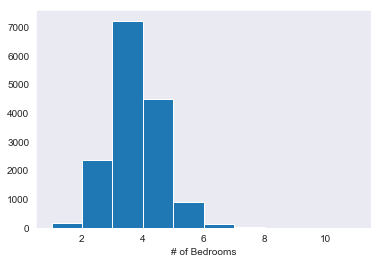

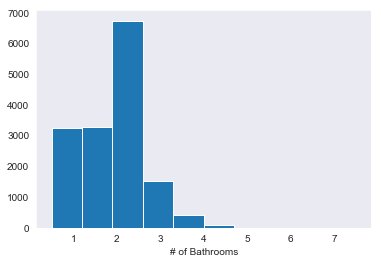

In [15]:
plt.hist(raw_data['bedrooms'])
plt.xlabel("# of Bedrooms")
plt.show()

plt.hist(raw_data['bathrooms'])
plt.xlabel("# of Bathrooms")
plt.show()

# Data Preparation

C:\Users\sohai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


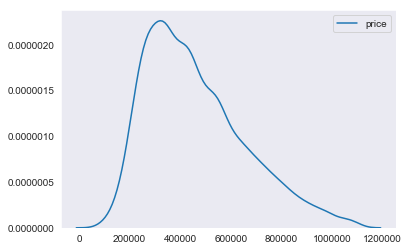

In [16]:
sns.kdeplot(raw_data['price'])

In [17]:
#raw_data['zipcode'].nunique()
raw_data['zipcode'] = raw_data['zipcode'].astype('object')

In [18]:
raw_data.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

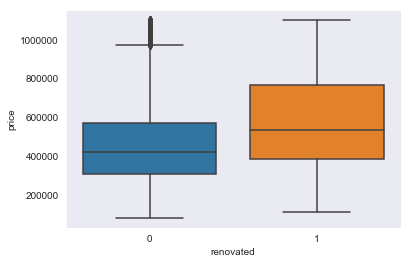

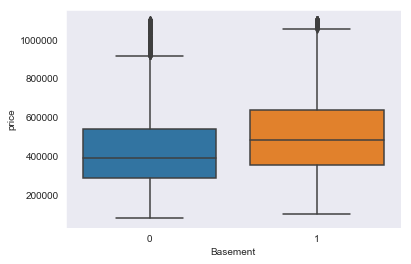

In [19]:
raw_data['renovated'] = np.where(raw_data['yr_renovated']>0, 1, 0)
sns.boxplot(x='renovated', y='price', data=raw_data)
plt.show()
raw_data['Basement'] = np.where(raw_data['sqft_basement']>0, 1, 0)
sns.boxplot(x='Basement', y='price', data=raw_data)
plt.show()

In [20]:
#Remove redundant variables and make a pointer for dummy variables for zipcode
dummies = pd.get_dummies(raw_data['zipcode'])
raw_data.drop(['sqft_living15', 'sqft_lot15', 'yr_renovated', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
               'zipcode'], 1, inplace=True)

In [21]:
X = raw_data.drop('price', 1)
Y = raw_data['price']
#make dummies for the zipcode
X_dummy = pd.concat([X, dummies], axis=1)
#Dropping some features that are no longer needed"
colnames = X_dummy.columns

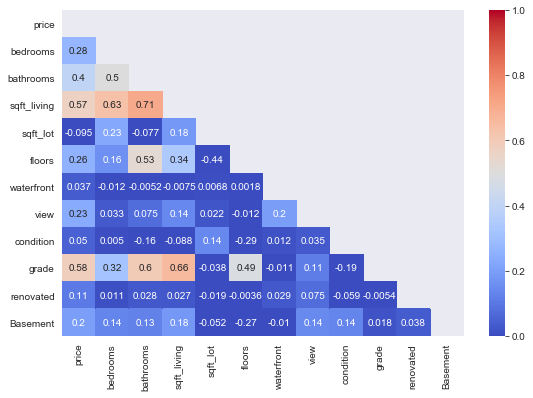

In [22]:
corrmat = raw_data.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(9,6))
sns.heatmap(raw_data.corr(), vmin=0, vmax=1, annot=True, mask=mask, cmap='coolwarm')
# sqft_living has the highest correlation w price, so we can use that for the simple linear regression

In [23]:
print("Correlations of features against Price")
display(raw_data.corr().iloc[:, 0].sort_values(ascending=False))
raw_data.columns
#sqft a good candidate for a simple linear regression

Correlations of features against Price


price          1.000000
grade          0.582748
sqft_living    0.572181
bathrooms      0.400404
bedrooms       0.277139
floors         0.257656
view           0.234465
Basement       0.200532
renovated      0.106454
condition      0.049844
waterfront     0.036920
sqft_lot      -0.095364
Name: price, dtype: float64

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'renovated', 'Basement'],
      dtype='object')

# PCA for colinear features

In [24]:
from sklearn.preprocessing import StandardScaler
df_pca = X.loc[:, ['sqft_living', 'grade', 'bedrooms', 'bathrooms', 'floors']]
scalar = StandardScaler(with_mean=True, with_std=True)
scalar = scalar.fit_transform(df_pca)

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principal_comp = pca.fit_transform(scalar)

df_components = pd.DataFrame(principal_comp, index=X.index, columns=['Living Quality'])

In [26]:
X_ = pd.concat([df_components, X], 1)
X_dummy_pca = pd.concat([df_components, X_dummy], 1)

In [27]:
X_.drop(['sqft_living', 'grade', 'bedrooms', 'bathrooms', 'floors'], axis=1, inplace=True)
X_dummy_pca.drop(['sqft_living', 'grade', 'bedrooms', 'bathrooms', 'floors'], axis=1, inplace=True)

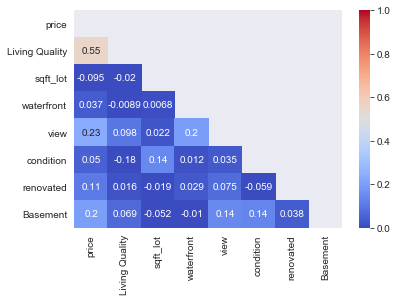

In [28]:
X_pca = pd.concat([raw_data['price'], X_], 1)
corrmat = X_pca.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(X_pca.corr(), vmin=0, vmax=1, mask=mask, annot=True, cmap='coolwarm')

# Center predictor variables so we can have a more robust linear model

In [29]:
scalar = StandardScaler(with_mean=True, with_std=True)
scaled = scalar.fit_transform(X) #for lasso and the basic regression on non-PCA features
scaled_df = pd.DataFrame(scaled, index=X.index, columns=X.columns)

X_scaled = pd.concat([scaled_df, dummies], 1) #final dataframe that we will use
#standardize features so that any extreme values in features are accounted for and coefficients are more interpretable

In [30]:
print('Original features scaled:')
display(X_scaled.head())

Original features scaled:


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,renovated,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,-0.312710,-1.433038,-0.971265,-0.195873,-0.908336,-0.030256,-0.242443,-0.607321,-0.448176,-0.193783,...,0,0,0,0,0,0,1,0,0,0
1,-0.312710,0.333021,1.017130,0.456139,0.900772,-0.030256,-0.242443,-0.607321,-0.448176,5.160423,...,0,0,0,0,0,0,0,0,0,0
2,-1.444037,-1.433038,-1.557770,1.585691,-0.908336,-0.030256,-0.242443,-0.607321,-1.521262,-0.193783,...,0,0,0,0,0,0,0,0,0,0
3,0.818618,1.392656,0.144525,-0.462084,-0.908336,-0.030256,-0.242443,2.489884,-0.448176,-0.193783,...,0,0,0,0,0,0,0,0,0,0
4,-0.312710,-0.020191,-0.256015,0.799346,-0.908336,-0.030256,-0.242443,-0.607321,0.624909,-0.193783,...,0,0,0,0,0,0,0,0,0,0


# Simple Linear Regression

In [31]:
# First, we make a dataframe to hold the results of our evaluations
evaluation = pd.DataFrame(index=np.arange(0,6),
                          columns=['Model', 'Mean Absolute Error (MAE)', 'CrossVal Score (avg)', 'CrossVal variance'])

In [32]:
from sklearn.linear_model import LinearRegression
simple_X = raw_data.loc[:, 'sqft_living'].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(simple_X, Y, test_size=.2, random_state=10)
lr = LinearRegression(fit_intercept=True)
#Using the sqft_living as the feature as it correlates the most with price
lr.fit(X_train, Y_train)

pearson_test = lr.score(X_test, Y_test)
print("\n20% holdout test score: \n", pearson_test)
print('\nIntercept:')
print(lr.intercept_)
print('\nCoefficients:')
print(lr.coef_)
mae = format(metrics.mean_absolute_error(Y_test, lr.predict(X_test)), '.3f')



20% holdout test score: 
 0.33511456881879675

Intercept:
159652.22201455617

Coefficients:
[161.53472907]


In [33]:
simple_cross = cross_val_score(lr, simple_X, Y, cv=10)
simple_cross

array([0.29109721, 0.30027322, 0.31636643, 0.28862962, 0.28995206,
       0.32829683, 0.34264782, 0.33654929, 0.32917461, 0.38641103])

In [34]:
evaluation.iloc[0] = ['Simple Linear Model', mae, simple_cross.mean(), simple_cross.std()]
evaluation

,Model,Mean Absolute Error (MAE),CrossVal Score (avg),CrossVal variance
0,Simple Linear Model,132910.652,0.32094,0.0290966
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN


## Use all features

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X_dummy, Y, test_size=.2, random_state=123)
full_lr = LinearRegression(fit_intercept=True) #We normalized the data, so no intercept needed
full_lr.fit(X_train, Y_train)

print("20% sample test score: ", full_lr.score(X_test, Y_test))
print("\nIntercept: ", full_lr.intercept_)
print("\nCoefficients: ", full_lr.coef_)
mae = format(metrics.mean_absolute_error(Y_test, full_lr.predict(X_test)), '.3f')
print("\nMean Absolute Error: ", mae)
#multicollinearity can explain why some of these coefficients are negative

20% sample test score:  0.8264022521291596

Intercept:  -199504.11009404552

Coefficients:  [-4.11367284e+03  9.86488158e+02  1.25646564e+02  4.88678306e+00
 -9.61582235e+03  2.16377063e+05  3.37177319e+04  2.67180467e+04
  4.51160426e+04  4.71666021e+04 -2.19854265e+04 -1.93136008e+05
 -1.79200579e+05 -1.85019304e+05  3.53363775e+05  1.38270500e+05
  9.22513483e+04  6.09938178e+04  4.45431796e+04 -1.12838010e+05
 -3.54384161e+04 -5.25908925e+04 -9.33347683e+04 -1.81263423e+05
 -2.08026846e+05 -6.26427265e+04  6.37466253e+04 -5.89947870e+04
  5.77711858e+04 -1.79976710e+05 -1.77541772e+05 -1.92302303e+05
  1.37471851e+05 -4.18275164e+03 -1.45713528e+05  4.66907375e+05
  2.35230205e+05 -1.77425423e+05 -9.00775859e+04  7.68416800e+04
  7.56884281e+04 -1.37921376e+05 -9.08350371e+04 -1.54165123e+05
 -8.12891568e+04 -4.27957894e+04 -1.57780450e+05 -2.75821598e+04
  4.84059948e+04  6.56720751e+04 -4.08417620e+04 -2.02820589e+05
  2.49140112e+05  1.47350243e+05  2.16076510e+05 -5.85820587e+0

In [36]:
multi_cross = cross_val_score(full_lr, X_dummy, Y, cv=10)
multi_cross

array([0.81709456, 0.80962471, 0.83608988, 0.80126906, 0.82402233,
       0.82827644, 0.83511424, 0.83945487, 0.82721336, 0.80369506])

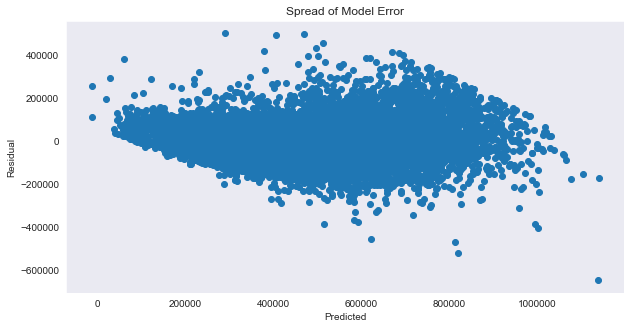

In [37]:
predicted = full_lr.predict(X_dummy)
residual = Y - predicted
plt.figure(figsize=(10,5))
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Spread of Model Error")
#plt.ylim([-5,10])
plt.show()
#Error distribution is not even, so a better model is needed

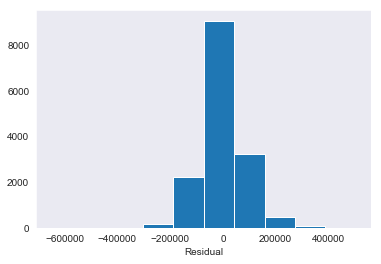

In [38]:
plt.hist(residual)
plt.xlabel("Residual")
plt.show()

In [39]:
evaluation.iloc[1] = ['Multivariable Regression (non-PCA)', mae, multi_cross.mean(), multi_cross.std()]
evaluation

,Model,Mean Absolute Error (MAE),CrossVal Score (avg),CrossVal variance
0,Simple Linear Model,132910.652,0.32094,0.0290966
1,Multivariable Regression (non-PCA),61512.172,0.822185,0.0129906
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN


# Multiple Variable Regression with PCA

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X_dummy_pca, Y, test_size=.2, random_state=10)
comp_lr = LinearRegression(fit_intercept=True)
comp_lr.fit(X_train, Y_train)
pearson_test = comp_lr.score(X_test, Y_test)
print("20% sample test score: ", pearson_test)
print("\nIntercept: ", comp_lr.intercept_)
print("\nCoefficients: ", comp_lr.coef_)
mae = format(metrics.mean_absolute_error(Y_test, comp_lr.predict(X_test)), '.3f')
print("\nMean Squared Error: ", mae)
X_train.columns

20% sample test score:  0.7873105150399519

Intercept:  285394.22843413026

Coefficients:  [ 5.90869470e+04  1.30729020e+01  1.94158129e+05  4.24252014e+04
  2.55086121e+04  4.20138478e+04  4.06037080e+02 -2.09831222e+05
 -1.90728023e+05 -1.93465791e+05  3.30995342e+05  1.41156824e+05
  9.65761905e+04  5.23220176e+04  4.02031234e+04 -1.49703406e+05
 -3.81290154e+04 -7.06130961e+04 -1.05706211e+05 -1.97435575e+05
 -2.11536929e+05 -3.45136590e+04  6.90919555e+04 -5.40487336e+04
  6.79935618e+04 -1.87420610e+05 -1.91188974e+05 -2.03732981e+05
  1.45091844e+05 -1.21002428e+04 -1.56318350e+05  4.78893366e+05
  2.36721378e+05 -1.85282009e+05 -1.03891837e+05  8.49619914e+04
  1.20630162e+05 -1.40307231e+05 -8.58075552e+04 -1.54565984e+05
 -7.74083897e+04 -2.50228138e+04 -1.85808300e+05 -1.65225796e+04
  7.54201941e+04  1.17180552e+05 -3.48695814e+04 -2.05855996e+05
  2.58830237e+05  1.54704914e+05  2.24838933e+05 -6.91607612e+04
  1.46541432e+05 -6.06888448e+04  2.69507240e+05  2.79428413e+05

Index(['Living Quality',       'sqft_lot',     'waterfront',           'view',
            'condition',      'renovated',       'Basement',            98001,
                  98002,            98003,            98004,            98005,
                  98006,            98007,            98008,            98010,
                  98011,            98014,            98019,            98022,
                  98023,            98024,            98027,            98028,
                  98029,            98030,            98031,            98032,
                  98033,            98034,            98038,            98039,
                  98040,            98042,            98045,            98052,
                  98053,            98055,            98056,            98058,
                  98059,            98065,            98070,            98072,
                  98074,            98075,            98077,            98092,
                  98102,            98103,          

In [41]:
pca_cross = cross_val_score(comp_lr, X_dummy_pca, Y, cv=10)
pca_cross

array([0.78869522, 0.76781331, 0.80551347, 0.75921573, 0.77878178,
       0.78640878, 0.8064798 , 0.80245312, 0.78734669, 0.70225623])

In [42]:
evaluation.iloc[2] = ['Multivariable Regression (PCA feats)', mae, pca_cross.mean(), pca_cross.std()]
evaluation

,Model,Mean Absolute Error (MAE),CrossVal Score (avg),CrossVal variance
0,Simple Linear Model,132910.652,0.32094,0.0290966
1,Multivariable Regression (non-PCA),61512.172,0.822185,0.0129906
2,Multivariable Regression (PCA feats),67876.164,0.778496,0.0293775
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN


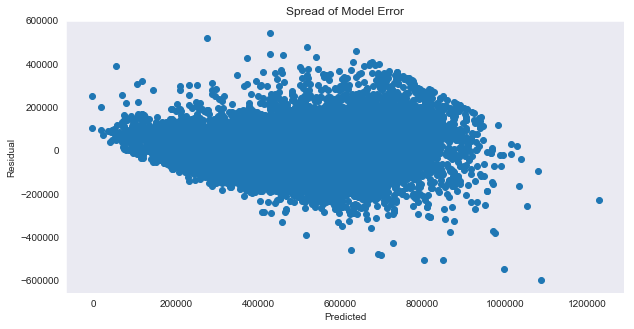

In [43]:
predicted = comp_lr.predict(X_dummy_pca)
residual = Y - predicted
plt.figure(figsize=(10,5))
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Spread of Model Error")

plt.show()

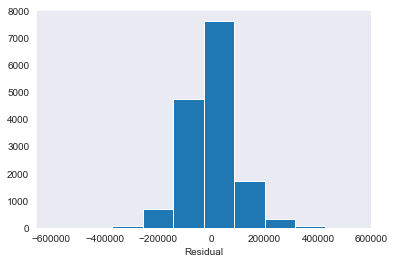

In [44]:
plt.hist(residual)
plt.xlabel("Residual")
plt.show()

## Lasso Regression

In [45]:
from sklearn.linear_model import Lasso
#Lets try to do lasso without the pca to see if we can get some interpretability
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=.2, random_state=10)
lasso = Lasso(alpha=.0001, fit_intercept=False, random_state=123, max_iter=5000, tol=.0001)
#try different lambdas
lasso.fit(X_train, Y_train)
print(X_scaled.columns)
print("\n20% sample score: ", lasso.score(X_test, Y_test))
print("\nCoefficients: ", lasso.coef_)

mae = format(metrics.mean_absolute_error(Y_test, lasso.predict(X_test)), '.3f')
print("\nMean Absolute Error: ", mae)
#convert into scientific notation for better interpretability

Index([   'bedrooms',   'bathrooms', 'sqft_living',    'sqft_lot',
            'floors',  'waterfront',        'view',   'condition',
             'grade',   'renovated',    'Basement',         98001,
               98002,         98003,         98004,         98005,
               98006,         98007,         98008,         98010,
               98011,         98014,         98019,         98022,
               98023,         98024,         98027,         98028,
               98029,         98030,         98031,         98032,
               98033,         98034,         98038,         98039,
               98040,         98042,         98045,         98052,
               98053,         98055,         98056,         98058,
               98059,         98065,         98070,         98072,
               98074,         98075,         98077,         98092,
               98102,         98103,         98105,         98106,
               98107,         98108,         98109,         98

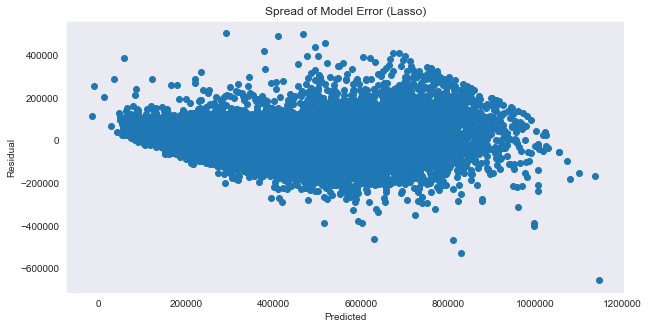

In [46]:
predicted = lasso.predict(X_scaled)
residual = Y - predicted
plt.figure(figsize=(10,5))
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Spread of Model Error (Lasso)")
plt.show()
#Error distribution is not even, so a better model is needed

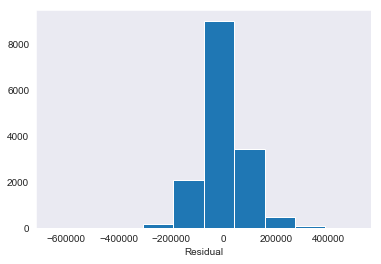

In [47]:
plt.hist(residual)
plt.xlabel("Residual")
plt.show()

In [48]:
lass_cross = cross_val_score(lasso, X_scaled, Y, cv=10)
lass_cross

array([0.81709456, 0.80962471, 0.83608988, 0.80126905, 0.82402233,
       0.82827644, 0.83511423, 0.83945487, 0.82721336, 0.80369506])

In [49]:
evaluation.iloc[3] = ['Lasso', mae, lass_cross.mean(), lass_cross.std()]
evaluation

,Model,Mean Absolute Error (MAE),CrossVal Score (avg),CrossVal variance
0,Simple Linear Model,132910.652,0.32094,0.0290966
1,Multivariable Regression (non-PCA),61512.172,0.822185,0.0129906
2,Multivariable Regression (PCA feats),67876.164,0.778496,0.0293775
3,Lasso,60098.064,0.822185,0.0129906
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN


## Ridge

In [50]:
from sklearn.linear_model import Ridge
#Lets try to do lasso without the pca to see if we can get some interpretability
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=.2, random_state=10)
ridge = Ridge(alpha=10, fit_intercept=False, random_state=123, max_iter=5000, tol=.0001)
#try different lambdas
ridge.fit(X_train, Y_train)
print(X_scaled.columns)
print("\n20% sample score: ", ridge.score(X_test, Y_test))
print("\nCoefficients: ", ridge.coef_)

mae = format(metrics.mean_absolute_error(Y_test, ridge.predict(X_test)), '.3f')
print("\nMean Absolute Error: ", mae)
#convert into scientific notation for better interpretability

Index([   'bedrooms',   'bathrooms', 'sqft_living',    'sqft_lot',
            'floors',  'waterfront',        'view',   'condition',
             'grade',   'renovated',    'Basement',         98001,
               98002,         98003,         98004,         98005,
               98006,         98007,         98008,         98010,
               98011,         98014,         98019,         98022,
               98023,         98024,         98027,         98028,
               98029,         98030,         98031,         98032,
               98033,         98034,         98038,         98039,
               98040,         98042,         98045,         98052,
               98053,         98055,         98056,         98058,
               98059,         98065,         98070,         98072,
               98074,         98075,         98077,         98092,
               98102,         98103,         98105,         98106,
               98107,         98108,         98109,         98

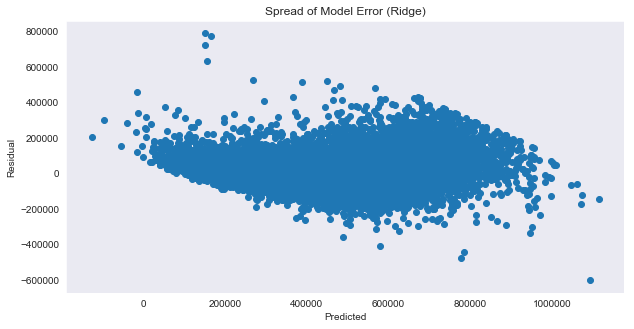

In [51]:
predicted = ridge.predict(X_scaled)
residual = Y - predicted
plt.figure(figsize=(10,5))
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Spread of Model Error (Ridge)")
plt.show()
#Error distribution is not even, so a better model is needed

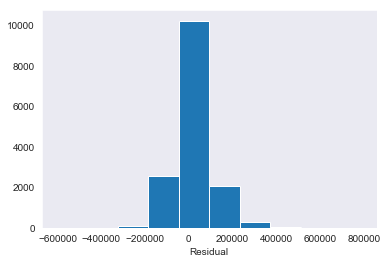

In [52]:
plt.hist(residual)
plt.xlabel("Residual")
plt.show()

In [53]:
ridge_cross = cross_val_score(ridge, X_scaled, Y, cv=10)
ridge_cross

array([0.80429841, 0.77010145, 0.80308352, 0.77900254, 0.80182362,
       0.80534209, 0.81057685, 0.8232633 , 0.8086729 , 0.77356615])

In [54]:
evaluation.iloc[4] = ['Ridge', mae, ridge_cross.mean(), ridge_cross.std()]
evaluation

,Model,Mean Absolute Error (MAE),CrossVal Score (avg),CrossVal variance
0,Simple Linear Model,132910.652,0.32094,0.0290966
1,Multivariable Regression (non-PCA),61512.172,0.822185,0.0129906
2,Multivariable Regression (PCA feats),67876.164,0.778496,0.0293775
3,Lasso,60098.064,0.822185,0.0129906
4,Ridge,65173.675,0.797973,0.0166751
5,NaN,NaN,NaN,NaN


# Gradient Boosting Regressor for feature selection

In [55]:
from sklearn import ensemble
param = {"max_depth": 6,
          "max_features": (len(X_dummy.columns)//3), #many statistical papers suggest n_feats/3 for regression
          "random_state": 10,
          "learning_rate": .125,
          "n_estimators": 190}
boost = ensemble.GradientBoostingRegressor(**param)
X_train, X_test, Y_train, Y_test = train_test_split(X_dummy, Y, test_size=.2, random_state=10)

boost.fit(X_train, Y_train)
pearson_test = boost.score(X_test, Y_test)
print("\n20% sample score: ", pearson_test)
mae_boost = format(metrics.mean_absolute_error(Y_test, boost.predict(X_test)), '.3f')
print("\nMean Absolute Error: ", mae_boost)

C:\Users\sohai\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d



20% sample score:  0.8554239984143825

Mean Absolute Error:  55321.198


In [56]:
clean = []
remove = []
feat_labels = X.columns
for feature in zip(feat_labels, boost.feature_importances_):
    if (feature[1]<0):
        print(feature)
        remove.append(feature[0])
    elif (feature[1]>.01):
        print(feature)
        clean.append(feature[0])
X = X.drop(remove, axis=1)
X_ = X_.drop(remove, axis=1)
print(clean)

('bedrooms', 0.027691962635749714)
('bathrooms', 0.040981887117938876)
('sqft_living', 0.11425845808028215)
('sqft_lot', 0.1040930438577398)
('floors', 0.01870691211602836)
('view', 0.02394569305576548)
('condition', 0.026124615644441875)
('grade', 0.07916289001464445)
('Basement', 0.01715418006449523)
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 'Basement']


In [57]:
boost_cross = cross_val_score(boost, X_dummy, Y, cv=10)
boost_cross

array([0.83023424, 0.83146393, 0.85784605, 0.82394746, 0.83332932,
       0.84643326, 0.85200513, 0.85518488, 0.84858868, 0.83177159])

In [58]:
evaluation.iloc[5] = ['Gradient Boosted Regressor', mae_boost, boost_cross.mean(), boost_cross.std()]
evaluation

,Model,Mean Absolute Error (MAE),CrossVal Score (avg),CrossVal variance
0,Simple Linear Model,132910.652,0.32094,0.0290966
1,Multivariable Regression (non-PCA),61512.172,0.822185,0.0129906
2,Multivariable Regression (PCA feats),67876.164,0.778496,0.0293775
3,Lasso,60098.064,0.822185,0.0129906
4,Ridge,65173.675,0.797973,0.0166751
5,Gradient Boosted Regressor,55321.198,0.84108,0.0115533


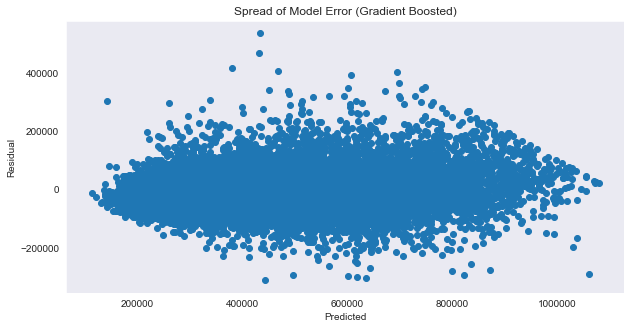

In [62]:
predicted = boost.predict(X_dummy)
residual = Y - predicted
plt.figure(figsize=(10,5))
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Spread of Model Error (Gradient Boosted)")
plt.show()
#Error distribution is not even, so a better model is needed
#compare the variance and std deviation of the residuals

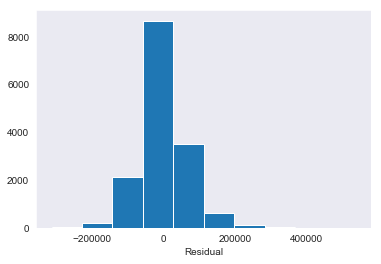

In [60]:
plt.hist(residual)
plt.xlabel("Residual")
plt.show()

# Final evaluation of model choice

In [61]:
evaluation.iloc[np.argsort(evaluation['CrossVal Score (avg)'])].reset_index(drop=True)

,Model,Mean Absolute Error (MAE),CrossVal Score (avg),CrossVal variance
0,Simple Linear Model,132910.652,0.32094,0.0290966
1,Multivariable Regression (PCA feats),67876.164,0.778496,0.0293775
2,Ridge,65173.675,0.797973,0.0166751
3,Lasso,60098.064,0.822185,0.0129906
4,Multivariable Regression (non-PCA),61512.172,0.822185,0.0129906
5,Gradient Boosted Regressor,55321.198,0.84108,0.0115533
